In [65]:
import pandas as pd

In [66]:
data = pd.read_csv('drive/MyDrive/public_dataset/housing.csv')

In [67]:
data.shape

(20640, 10)

In [68]:
len(data)

20640

In [69]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [71]:
import numpy as np 

np.unique(data['ocean_proximity'])

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [72]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


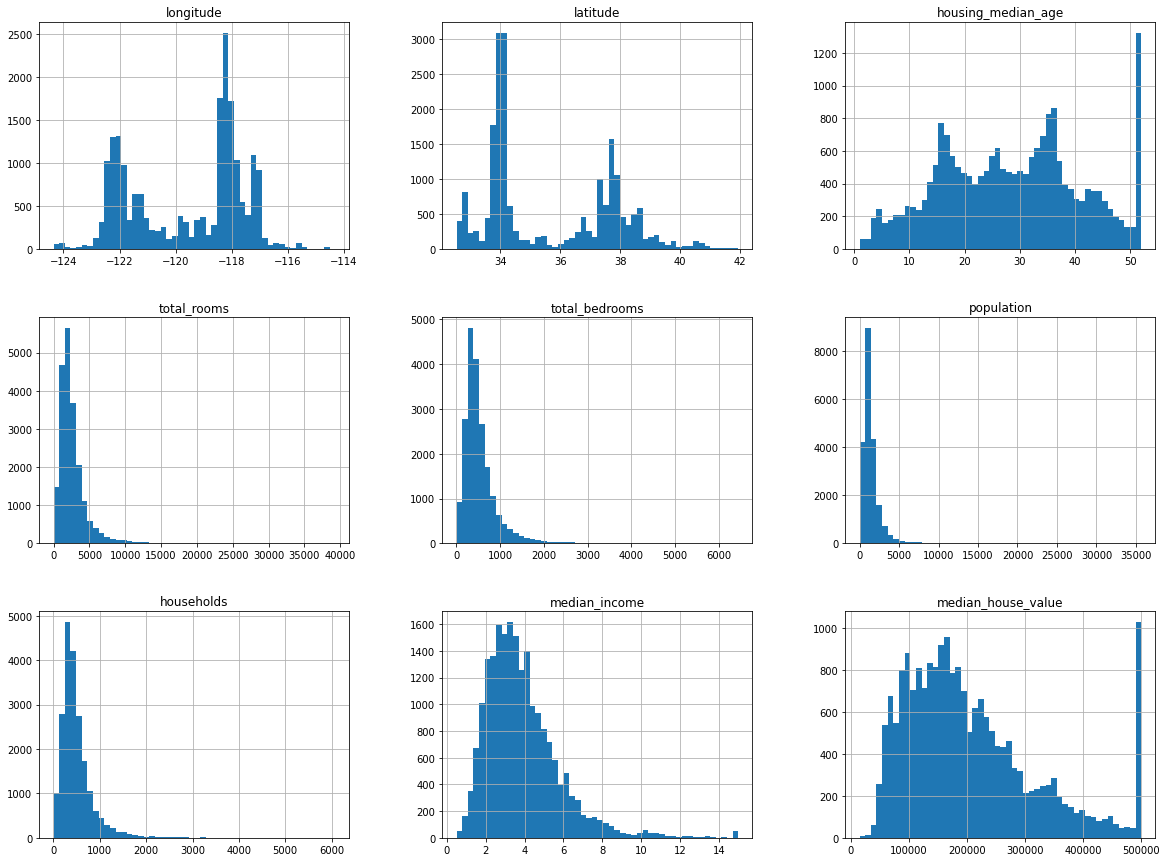

In [73]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

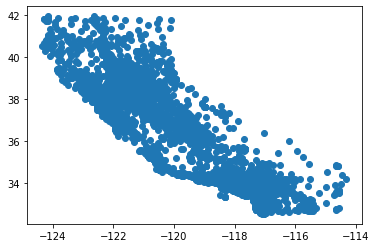

In [74]:
import matplotlib.pyplot as plt 

plt.scatter(x=data['longitude'], y=data['latitude'])
plt.show()

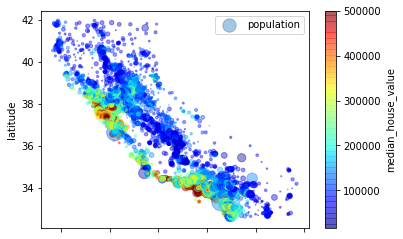

In [75]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
         s=data["population"]/100, label="population",
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()

In [76]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [77]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# bỏ đi thuộc tính không phải là numeric 
housing_num = data.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

X = imputer.transform(housing_num)

In [78]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [79]:
# dữ liệu sau khi xử lý
housing_tr.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [80]:
housing_tr.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [81]:
from sklearn.preprocessing import LabelEncoder

# chuyển về dạng numeric 
encoder = LabelEncoder()
ocean_proximity = data["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(ocean_proximity)

In [82]:
data["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [83]:
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('std_scaler', StandardScaler()),
        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [85]:
housing_num.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [86]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [87]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [88]:
import numpy as np

data_pre_process = np.append(housing_cat_encoded.reshape(-1, 1),housing_num_tr, axis = 1)

In [89]:
data_pre_process.shape

(20640, 10)

In [90]:
data_pre_process

array([[ 3.        , -1.32783522,  1.05254828, ..., -0.97703285,
         2.34476576,  2.12963148],
       [ 3.        , -1.32284391,  1.04318455, ...,  1.66996103,
         2.33223796,  1.31415614],
       [ 3.        , -1.33282653,  1.03850269, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [ 1.        , -0.8237132 ,  1.77823747, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [ 1.        , -0.87362627,  1.77823747, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [ 1.        , -0.83369581,  1.75014627, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [91]:
y = data_pre_process[:, -1]
X = np.delete(data_pre_process, -1, axis=1)

In [92]:
data_pre_process.shape

(20640, 10)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
X_test

array([[ 1.        ,  0.27936569,  0.20044873, ..., -0.02956174,
        -0.36759652, -1.15248922],
       [ 1.        ,  0.05475686, -0.23028292, ...,  0.12320645,
         0.22091497, -0.70501534],
       [ 3.        , -1.43265267,  1.01509336, ..., -0.1019721 ,
         1.21222987, -0.20558796],
       ...,
       [ 0.        , -1.23799169,  0.78568194, ...,  0.14086751,
         0.17906526,  2.82092723],
       [ 1.        , -0.09498235,  0.53286119, ..., -0.17526551,
        -0.06680176, -0.57147326],
       [ 0.        ,  0.59880935, -0.66101456, ...,  0.21681008,
        -0.13480753, -0.16768875]])

In [95]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [96]:
from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_predictions, squared=True)

print(mse)

0.38015984924836316


In [97]:
import joblib
joblib.dump(lin_reg, "linear_regression.pkl")

['linear_regression.pkl']

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print(rmse_scores)

[0.58501958 0.55203789 0.77413605 0.50059421 0.70976015 0.62064495
 0.47089455 0.75073147 0.67997721 0.47888462]


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
import numpy as np


model = RandomForestRegressor(bootstrap=True)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

avg_score = np.mean(rmse_scores)

print(avg_score)

0.6569872764005934


In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5,
                               scoring='neg_mean_squared_error')

grid_search.fit(X, y)

grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [ ]:
grid_search.cv_results_

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
import numpy as np


model = RandomForestRegressor(max_features = 2, n_estimators = 30, bootstrap=True)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-scores)

avg_score = np.mean(rmse_scores)

print(avg_score)

0.6092443442991402
